**Geophysical Layer derived from Aeromagnetic Data**

1.Installing Required Libraries

In [ ]:
!pip install rasterio matplotlib numpy scipy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 72.3 MB/s eta 0:00:00


2. Uploading Tiff File for Processing

In [ ]:
from google.colab import files

tiff_path = "/content/magnetic/TAIL_TMI_GE.tiff"


3. Visualise the Tiff File for Understanding  

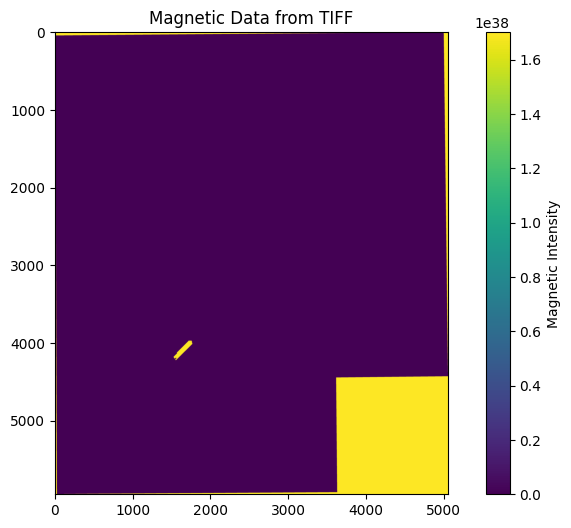

In [ ]:
import rasterio
import matplotlib.pyplot as plt

with rasterio.open(tiff_path) as src:
    magnetic_data = src.read(1)
    profile = src.profile
    transform = src.transform

plt.figure(figsize=(10, 6))
plt.imshow(magnetic_data, cmap="viridis")
plt.colorbar(label="Magnetic Intensity")
plt.title("Magnetic Data from TIFF")
plt.show()


4. Calculation for Analytic Signal and Tilt Derivatives

In [ ]:
import numpy as np
from scipy.ndimage import sobel

# Horizontal and vertical derivatives
grad_x = sobel(magnetic_data, axis=1)
grad_y = sobel(magnetic_data, axis=0)

# Analytic signal
analytic_signal = np.sqrt(grad_x**2 + grad_y**2)

# Tilt derivative
with np.errstate(divide='ignore', invalid='ignore'):
    tilt_derivative = np.arctan2(grad_y, grad_x)


5. Plotting the Outputs

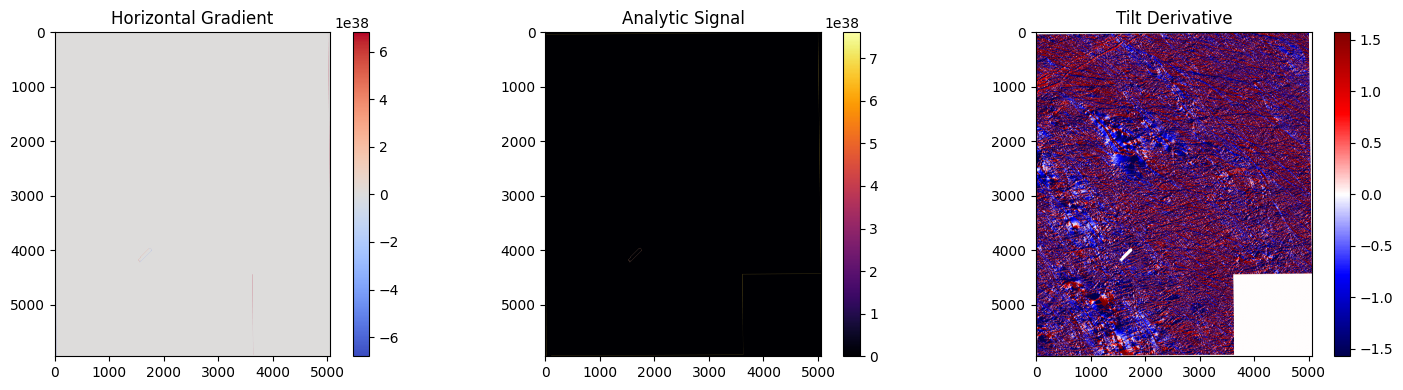

In [ ]:
plt.figure(figsize=(15, 4))

plt.subplot(1, 3, 1)
plt.imshow(grad_x, cmap='coolwarm')
plt.title("Horizontal Gradient")
plt.colorbar()

plt.subplot(1, 3, 2)
plt.imshow(analytic_signal, cmap='inferno')
plt.title("Analytic Signal")
plt.colorbar()

plt.subplot(1, 3, 3)
plt.imshow(tilt_derivative, cmap='seismic', vmin=-np.pi/2, vmax=np.pi/2)
plt.title("Tilt Derivative")
plt.colorbar()

plt.tight_layout()
plt.show()


6. Exporting Analytic Signals and Tilt Derivative

In [ ]:
def export_tiff(output_array, filename, ref_profile):
    profile_out = ref_profile.copy()
    profile_out.update(dtype=rasterio.float32, count=1)

    with rasterio.open(filename, 'w', **profile_out) as dst:
        dst.write(output_array.astype(np.float32), 1)

    files.download(filename)

# Export analytic signal and tilt
export_tiff(analytic_signal, "analytic_signal.tif", profile)
export_tiff(tilt_derivative, "tilt_derivative.tif", profile)


<ipython-input-7-035d99d87d9e>:6: RuntimeWarning: overflow encountered in cast
  dst.write(output_array.astype(np.float32), 1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

7. Calculating First Vertical Derivatives and Second Vertical Derivatives

In [ ]:
from scipy.ndimage import laplace

# First vertical derivative (∂M/∂y)
first_vertical = sobel(magnetic_data, axis=0)

# Second vertical derivative (∂²M/∂y²)
second_vertical = laplace(first_vertical, mode='mirror')


8. Plotting Second Vertical Derivative

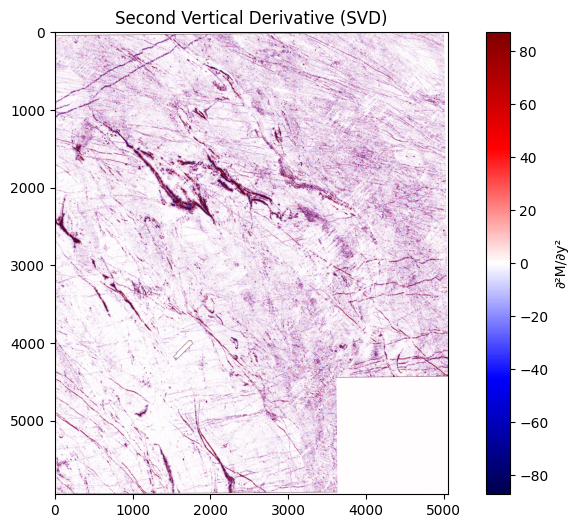

In [ ]:
plt.figure(figsize=(10, 6))
plt.imshow(second_vertical, cmap="seismic", vmin=-np.percentile(np.abs(second_vertical), 99), vmax=np.percentile(np.abs(second_vertical), 99))
plt.title("Second Vertical Derivative (SVD)")
plt.colorbar(label="∂²M/∂y²")
plt.show()


9. Exporting the Second Vertical Derivative Output

In [ ]:
export_tiff(second_vertical, "second_vertical_derivative.tif", profile)


<ipython-input-7-035d99d87d9e>:6: RuntimeWarning: overflow encountered in cast
  dst.write(output_array.astype(np.float32), 1)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>